# Example of Non-Flat ABAF (ICCMA style) 

ICCMA competition: https://www.iccma.org/

ABAF(Assumptions=[a0,a1,a2,a3,a4,a5,a6,a7], Rules=[r1[0.5]: s8 :- a1, a6, a0.,r2[0.5]: s8 :- a1.,r3[0.5]: s8 :- a1, a5, a3.,r4[0.5]: s8 :- a5, a3.,r5[0.5]: s7 :- a0.,r6[0.5]: s12 :- a5, a6, a3.,r7[0.5]: s12 :- a7, a1, a6, a4, a2.,r8[0.5]: s12 :- a1, s7, a6, a2, a0.,r9[0.5]: s3 :- a4.,r10[0.5]: s3 :- a1.,r11[0.5]: s3 :- a1, a2, a0.,r12[0.5]: s5 :- a3.,r13[0.5]: s5 :- a3, a7, a1, s7, a0.,r14[0.5]: s16 :- a5, s7, a3, a0.,r15[0.5]: s16 :- a5, a7, a2, s7.,r16[0.5]: s16 :- s12, s5.,r17[0.5]: s14 :- a7.,r18[0.5]: s6 :- a5, s16.,r19[0.5]: s6 :- a7, s8, a5, s16, a0.,r20[0.5]: s11 :- s7, a7, s6, a6.,r21[0.5]: s11 :- a5.,r22[0.5]: s11 :- s3, s16.,r23[0.5]: s2 :- a1, s8.,r24[0.5]: s2 :- a4, s12.,r25[0.5]: s2 :- a7, a1, s12, a0.,r26[0.5]: s2 :- s14, a3, s5, a5, a0.,r27[0.5]: s10 :- a4, s12, a3, a0.,r28[0.5]: s10 :- s6, a0.,r29[0.5]: s10 :- a5, s12.,r30[0.5]: s10 :- s14, a3, a7, s16, a4.,r31[0.5]: s10 :- a7.,r32[0.5]: s4 :- s6.,r33[0.5]: s4 :- s16.,r34[0.5]: s0 :- a6, a0.,r35[0.5]: s0 :- s12.,r36[0.

Analysing rules: 100%|██████████| 50/50 [00:00<00:00, 1282.74it/s]


0.34s to build 547 arguments

Support: {a0} -> a0 
Support: {a0,a2,a3,a4,a5,a6,a7} -> a1 
Support: {a0,a2,a5,a7} -> a1 
Support: {a3,a4,a5,a6,a7} -> a1 
Support: {a0,a1,a2,a4,a5,a6,a7} -> a1 
Support: {a0,a1,a2,a3,a6} -> a1 
Support: {a0,a1,a2,a5,a7} -> a1 
Support: {a0,a1,a3,a5,a7} -> a1 
Support: {a2,a3,a5,a6,a7} -> a1 
Support: {a1,a2,a3,a4,a6,a7} -> a1 
Support: {a0,a2,a3,a6,a7} -> a1 
Support: {a2,a3,a4,a5,a6,a7} -> a1 
Support: {a0,a1,a2,a3,a5,a6,a7} -> a1 
Support: {a0,a1,a2,a5,a6,a7} -> a1 
Support: {a3,a5,a6} -> a1 
Support: {a0,a1,a2,a3,a4,a6,a7} -> a1 
Support: {a0,a1,a2,a3,a5,a7} -> a1 
Support: {a0,a1,a2,a3,a6,a7} -> a1 
Support: {a0,a2,a3,a4,a6,a7} -> a1 
Support: {a0,a2,a5,a6,a7} -> a1 
Support: {a3,a5,a6,a7} -> a1 
Support: {a0,a3,a5,a6,a7} -> a1 
Support: {a1,a2,a4,a5,a6,a7} -> a1 
Support: {a1,a3,a5,a6,a7} -> a1 
Support: {a2,a3,a6} -> a1 
Support: {a0,a3,a5,a6} -> a1 
Support: {a0,a1,a3,a5,a6,a7} -> a1 
Support: {a1,a3,a4,a5,a6,a7} -> a1 
Support: {a2,a3,a4,a6,a7} ->

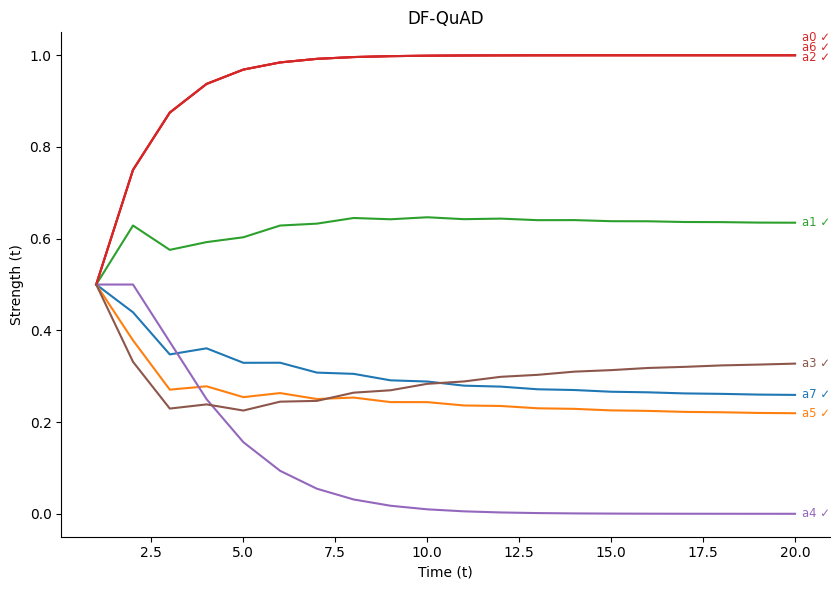

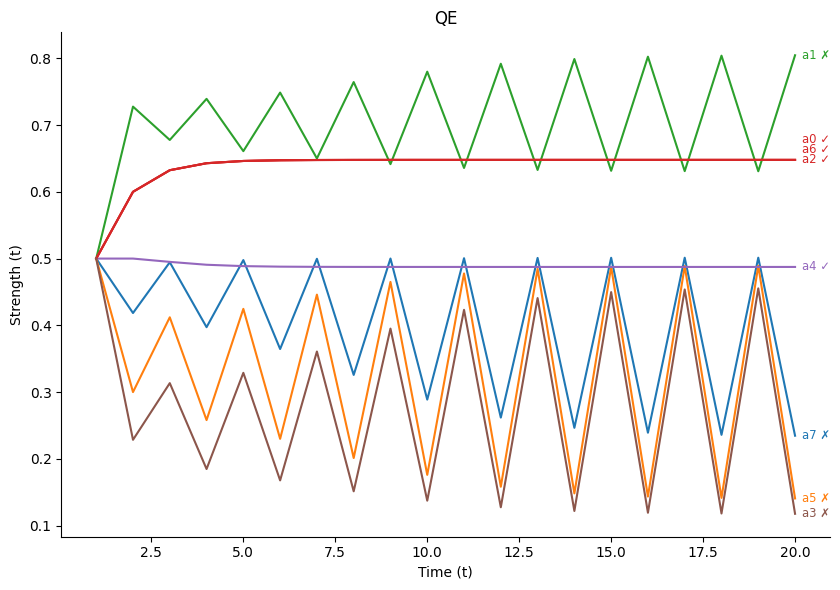

In [10]:
import sys
sys.path.append("../")

from plotting import strengthplot

from ABAF import ABAF
from semantics.bsafDiscreteModular import DiscreteModular
from semantics.modular.LinearInfluence import LinearInfluence
from semantics.modular.ProductAggregation import ProductAggregation
from semantics.modular.SetProductAggregation import SetProductAggregation
from semantics.modular import SumAggregation
from semantics.modular import QuadraticMaximumInfluence

## Load ICCMA example
abaf = ABAF(path=rf"./iccma_style_abafs/non_flat_1_s25_c0.02_n0.2_a0.3_r5_b5_1.aba")

DELTA = 5
EPSILON = 1e-2

print(abaf)

print(f"Number of Assumptions: {len(abaf.assumptions)}")
print(f"Number of Rules: {len(abaf.rules)}")
print(f"Is Flat: {not abaf.non_flat}")

bsaf = abaf.to_bsaf()

print(bsaf)

### BSAF QE Model with SetProductAggregation
model = DiscreteModular(BSAF=bsaf, aggregation=ProductAggregation(), 
                        influence=LinearInfluence(conservativeness=1), 
                        set_aggregation=SetProductAggregation())

model.solve(20, generate_plot=True, verbose=True)

strengthplot(model, delta=DELTA, epsilon=EPSILON,
             title="DF-QuAD", wide=10, tall=6)

# check convergence over the last 5 iterations, with ε=1e-3
per_arg = model.has_converged(epsilon=1e-2, last_n=DELTA)
print(per_arg)  
# e.g. {'a0': True, 'a1': False, ...}

if model.is_globally_converged(epsilon=EPSILON, last_n=DELTA):
    print("All assumptions have stabilized in the last 5 steps.")
else:
    print("Some are still oscillating or drifting.")

### BSAF QE Model with SetProductAggregation
model2 = DiscreteModular(BSAF=bsaf, aggregation=SumAggregation(), 
                        influence=QuadraticMaximumInfluence(conservativeness=1), 
                        set_aggregation=SetProductAggregation())

model2.solve(20, generate_plot=True, verbose=True)

strengthplot(model2, delta=DELTA, epsilon=EPSILON,
             title="QE", wide=10, tall=6)

# check convergence over the last 5 iterations, with ε=1e-3
per_arg = model2.has_converged(epsilon=EPSILON, last_n=DELTA)
print(per_arg)  
# e.g. {'a0': True, 'a1': False, ...}

if model2.is_globally_converged(epsilon=EPSILON, last_n=DELTA):
    print("All assumptions have stabilized in the last 5 steps.")
else:
    print("Some are still oscillating or drifting.")


ABAF(Assumptions=[a0,a1,a2,a3,a4,a5,a6,a7], Rules=[r1[0.5]: s8 :- a1, a6, a0.,r2[0.5]: s8 :- a1.,r3[0.5]: s8 :- a1, a5, a3.,r4[0.5]: s8 :- a5, a3.,r5[0.5]: s7 :- a0.,r6[0.5]: s12 :- a5, a6, a3.,r7[0.5]: s12 :- a7, a1, a6, a4, a2.,r8[0.5]: s12 :- a1, s7, a6, a2, a0.,r9[0.5]: s3 :- a4.,r10[0.5]: s3 :- a1.,r11[0.5]: s3 :- a1, a2, a0.,r12[0.5]: s5 :- a3.,r13[0.5]: s5 :- a3, a7, a1, s7, a0.,r14[0.5]: s16 :- a5, s7, a3, a0.,r15[0.5]: s16 :- a5, a7, a2, s7.,r16[0.5]: s16 :- s12, s5.,r17[0.5]: s14 :- a7.,r18[0.5]: s6 :- a5, s16.,r19[0.5]: s6 :- a7, s8, a5, s16, a0.,r20[0.5]: s11 :- s7, a7, s6, a6.,r21[0.5]: s11 :- a5.,r22[0.5]: s11 :- s3, s16.,r23[0.5]: s2 :- a1, s8.,r24[0.5]: s2 :- a4, s12.,r25[0.5]: s2 :- a7, a1, s12, a0.,r26[0.5]: s2 :- s14, a3, s5, a5, a0.,r27[0.5]: s10 :- a4, s12, a3, a0.,r28[0.5]: s10 :- s6, a0.,r29[0.5]: s10 :- a5, s12.,r30[0.5]: s10 :- s14, a3, a7, s16, a4.,r31[0.5]: s10 :- a7.,r32[0.5]: s4 :- s6.,r33[0.5]: s4 :- s16.,r34[0.5]: s0 :- a6, a0.,r35[0.5]: s0 :- s12.,r36[0.

Analysing rules: 100%|██████████| 50/50 [00:00<00:00, 1148.73it/s]


0.29s to build 547 arguments

Support: {a0} -> a0 
Support: {a0,a2,a3,a4,a5,a6,a7} -> a1 
Support: {a0,a2,a5,a7} -> a1 
Support: {a3,a4,a5,a6,a7} -> a1 
Support: {a0,a1,a2,a4,a5,a6,a7} -> a1 
Support: {a0,a1,a2,a3,a6} -> a1 
Support: {a0,a1,a2,a5,a7} -> a1 
Support: {a0,a1,a3,a5,a7} -> a1 
Support: {a2,a3,a5,a6,a7} -> a1 
Support: {a1,a2,a3,a4,a6,a7} -> a1 
Support: {a0,a2,a3,a6,a7} -> a1 
Support: {a2,a3,a4,a5,a6,a7} -> a1 
Support: {a0,a1,a2,a3,a5,a6,a7} -> a1 
Support: {a0,a1,a2,a5,a6,a7} -> a1 
Support: {a3,a5,a6} -> a1 
Support: {a0,a1,a2,a3,a4,a6,a7} -> a1 
Support: {a0,a1,a2,a3,a5,a7} -> a1 
Support: {a0,a1,a2,a3,a6,a7} -> a1 
Support: {a0,a2,a3,a4,a6,a7} -> a1 
Support: {a0,a2,a5,a6,a7} -> a1 
Support: {a3,a5,a6,a7} -> a1 
Support: {a0,a3,a5,a6,a7} -> a1 
Support: {a1,a2,a4,a5,a6,a7} -> a1 
Support: {a1,a3,a5,a6,a7} -> a1 
Support: {a2,a3,a6} -> a1 
Support: {a0,a3,a5,a6} -> a1 
Support: {a0,a1,a3,a5,a6,a7} -> a1 
Support: {a1,a3,a4,a5,a6,a7} -> a1 
Support: {a2,a3,a4,a6,a7} ->

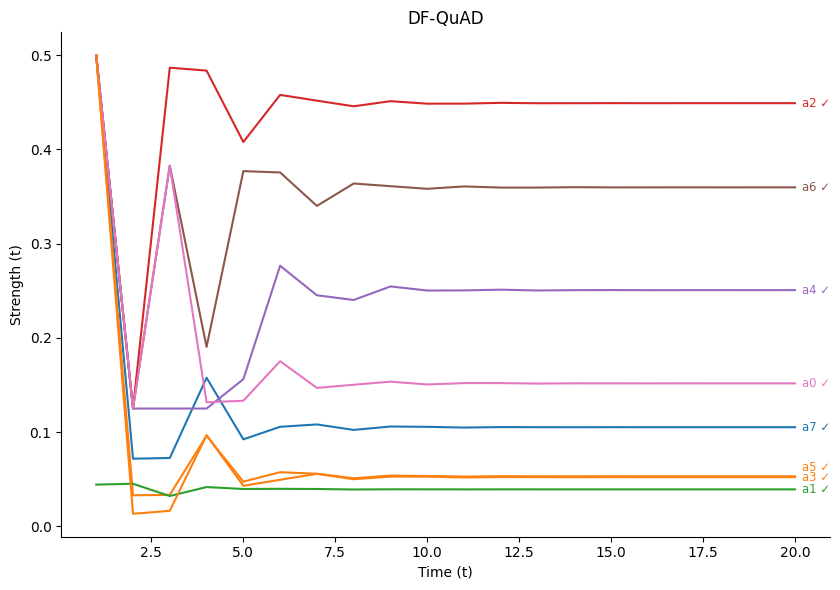

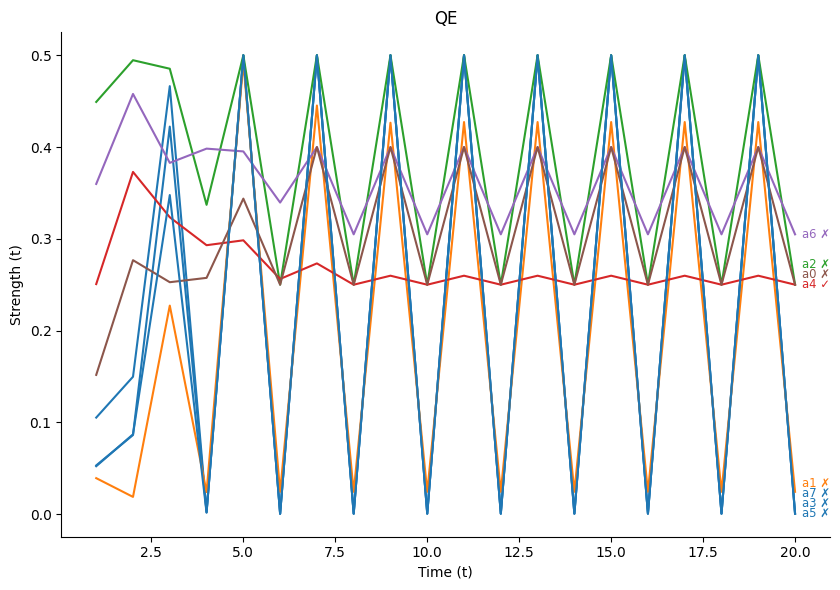

In [11]:
import sys
sys.path.append("../")

from BAG import BAG

from plotting import strengthplot

from ABAF import ABAF
from semantics.DiscreteModularModel import DiscreteModularBAG

from semantics.modular.LinearInfluence import LinearInfluence
from semantics.modular.ProductAggregation import ProductAggregation
from semantics.modular.SetProductAggregation import SetProductAggregation
from semantics.modular import SumAggregation
from semantics.modular import QuadraticMaximumInfluence
from semantics.modular.SetMeanAggregation import SetMeanAggregation


## Load ICCMA example
abaf = ABAF(path=rf"./iccma_style_abafs/non_flat_1_s25_c0.02_n0.2_a0.3_r5_b5_1.aba")

DELTA = 5
EPSILON = 1e-2

print(abaf)

print(f"Number of Assumptions: {len(abaf.assumptions)}")
print(f"Number of Rules: {len(abaf.rules)}")

bag = abaf.to_bag()

print(bsaf)

### BSAF QE Model with SetProductAggregation
model = DiscreteModularBAG(bag=bag, aggregation=ProductAggregation(), 
                        influence=LinearInfluence(conservativeness=1), 
                        set_aggregation=SetProductAggregation())

model.solve(20, generate_plot=True, verbose=True, view='Assumptions', 
            assumptions=abaf.assumptions, aggregate_strength_f=SetMeanAggregation())

strengthplot(model, delta=DELTA, epsilon=EPSILON,
             title="DF-QuAD", wide=10, tall=6)

# check convergence over the last 5 iterations, with ε=1e-3
per_arg = model.has_converged(epsilon=1e-2, last_n=DELTA)
print(per_arg)  
# e.g. {'a0': True, 'a1': False, ...}

if model.is_globally_converged(epsilon=EPSILON, last_n=DELTA):
    print("All assumptions have stabilized in the last 5 steps.")
else:
    print("Some are still oscillating or drifting.")

### BSAF QE Model with SetProductAggregation
model2 = DiscreteModularBAG(bag=bag, aggregation=SumAggregation(), 
                        influence=QuadraticMaximumInfluence(conservativeness=1), 
                        set_aggregation=SetProductAggregation())

model2.solve(20, generate_plot=True, verbose=True, view='Assumptions', 
            assumptions=abaf.assumptions, aggregate_strength_f=SetMeanAggregation())

strengthplot(model2, delta=DELTA, epsilon=EPSILON,
             title="QE", wide=10, tall=6)

# check convergence over the last 5 iterations, with ε=1e-3
per_arg = model2.has_converged(epsilon=EPSILON, last_n=DELTA)
print(per_arg)  
# e.g. {'a0': True, 'a1': False, ...}

if model2.is_globally_converged(epsilon=EPSILON, last_n=DELTA):
    print("All assumptions have stabilized in the last 5 steps.")
else:
    print("Some are still oscillating or drifting.")
